# NAMA : UMAR RAFI' BESARIONO
# NIM : A11.2022.14050
# KELP : DS_04

#  1. Data Understanding & EDA (Konsep EDA)

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Dataset dan lihat informaasi

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bengkod/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#cek unique value

for col in df.columns:
    print(f"Unique values in '{col}':")
    if df[col].dtype == 'object':
        print(df[col].value_counts())
    else:
        print(df[col].unique())
    print("-" * 30)

Unique values in 'customerID':
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
------------------------------
Unique values in 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------
Unique values in 'SeniorCitizen':
[0 1]
------------------------------
Unique values in 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------
Unique values in 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------
Unique values in 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


persentase missing value:
TotalCharges        0.156183
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
customerID          0.000000
Dependents          0.000000
tenure              0.000000
MultipleLines       0.000000
PhoneService        0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
InternetService     0.000000
TechSupport         0.000000
StreamingTV         0.000000
Contract            0.000000
StreamingMovies     0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
Churn               0.000000
dtype: float64


/tmp/ipython-input-3776880734.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_persentase.index, y=missing_persentase.values, palette='viridis')


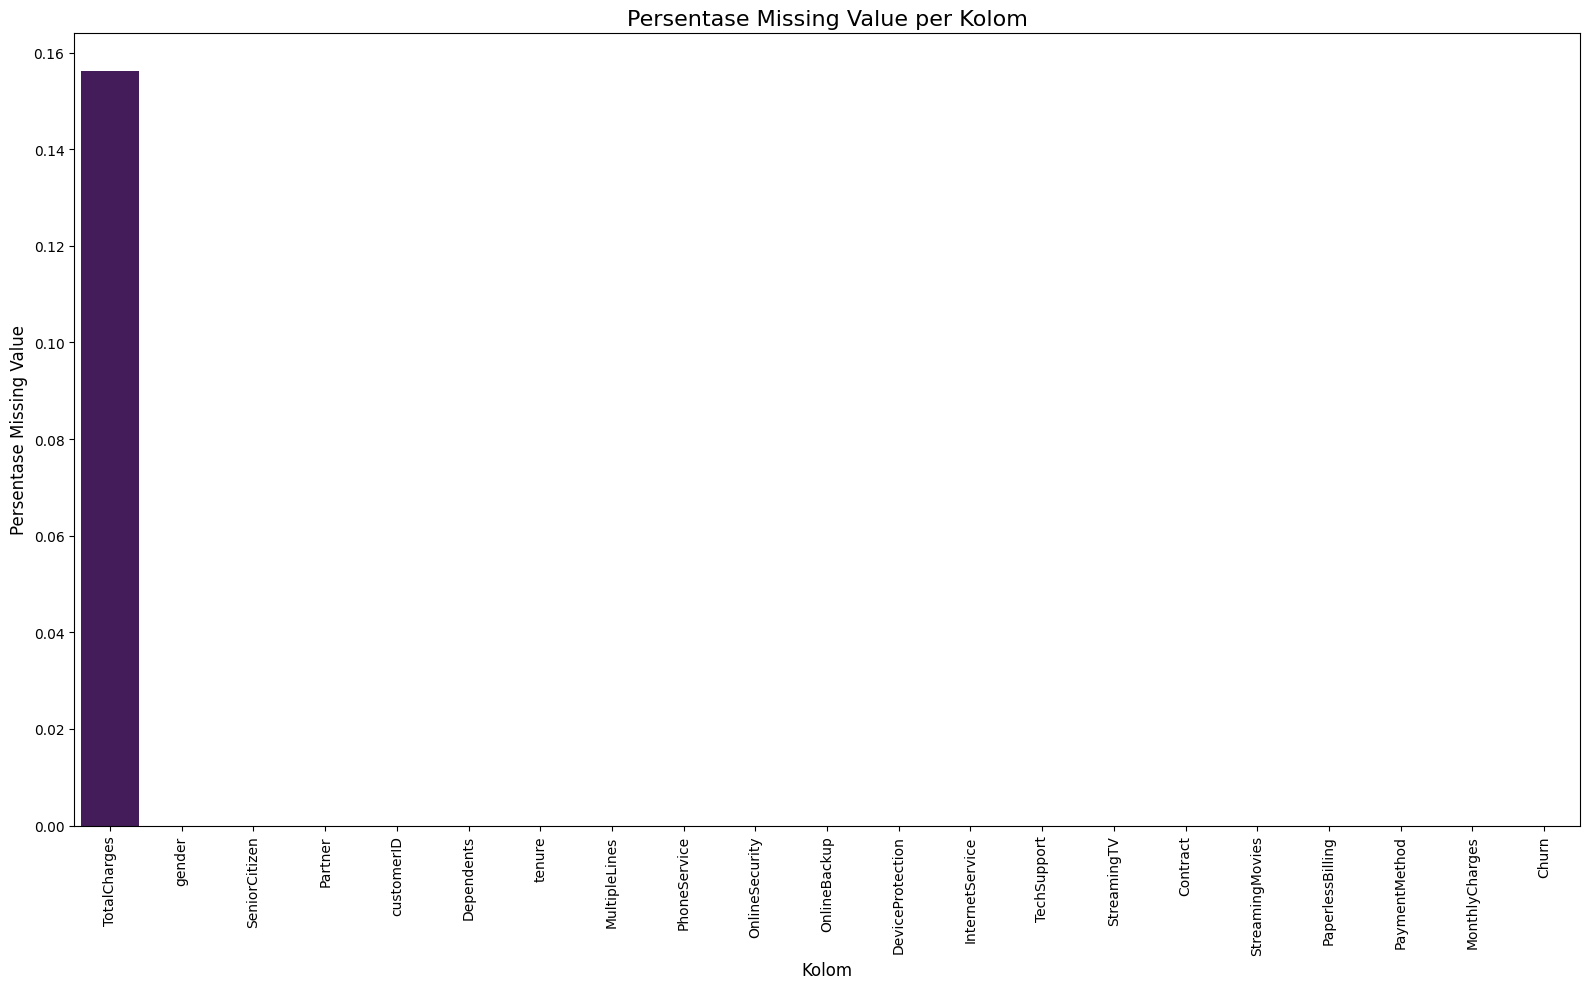

In [ ]:
#ubah totalCharge menjadi numerik
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
missing_persentase = (df.isnull().sum() / len(df)) * 100
missing_persentase = missing_persentase.sort_values(ascending=False)
print("persentase missing value:")
print(missing_persentase)

#Persentase missing values dan visualisasinya
plt.figure(figsize=(16, 10))
sns.barplot(x=missing_persentase.index, y=missing_persentase.values, palette='viridis')
plt.title('Persentase Missing Value per Kolom', fontsize=16)
plt.xlabel('Kolom', fontsize=12)
plt.ylabel('Persentase Missing Value', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#penanganan missing value
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

/tmp/ipython-input-3828991374.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


/tmp/ipython-input-517315241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


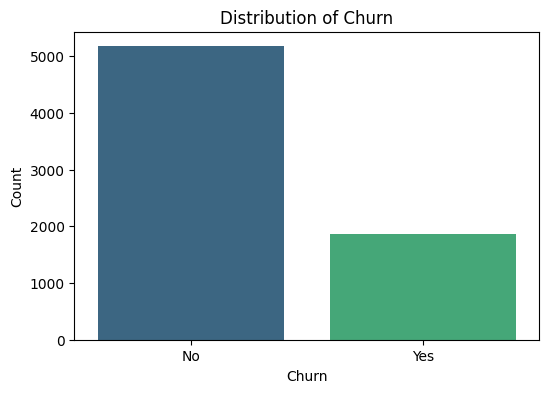

persentase distribusi label target:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#persentase
print("persentase distribusi label target:")
print(df['Churn'].value_counts(normalize=True) * 100)

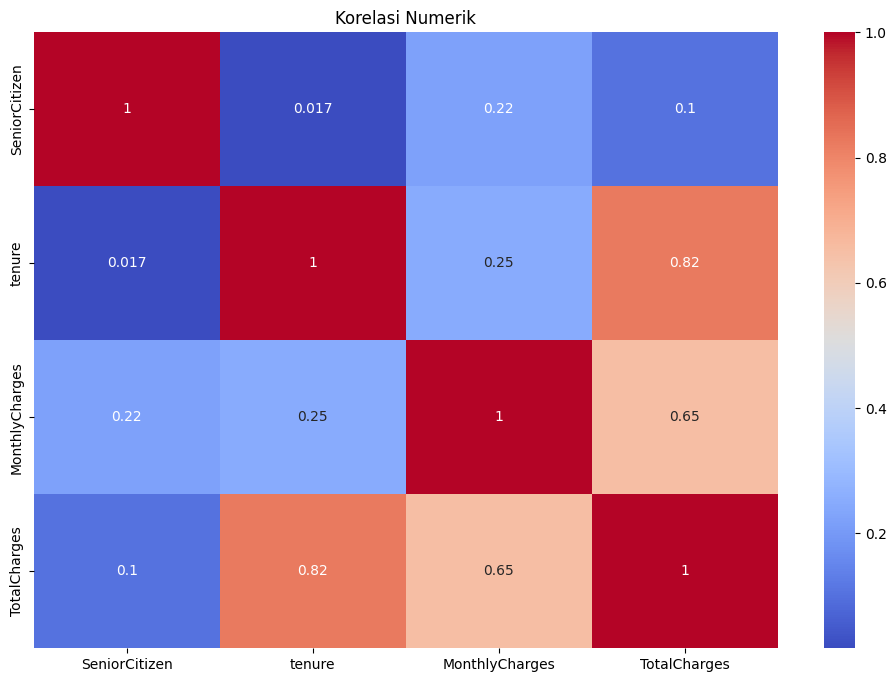

In [ ]:
#numerik dan kategorikal kolom
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Numerik')
plt.show()


# 2. Direct Modeling

In [ ]:
#Menetapkan variabel target
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

#ubah target
y = y.map({'Yes': 1, 'No': 0})
X = pd.get_dummies(X, drop_first=True)

#train test split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
#Model Logistic Regression
lr_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=2000)

#Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#Model Ensemble Voting (Soft Voting)
estimators = [('lr', lr_model), ('rf', rf_model)]
vc_model = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)

# Simpan model
direct_Models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'Voting Classifier': vc_model
}

#simpan hasil evaluasi
results = {}


Melatih model: Logistic Regression...
{'Accuracy': 0.8048261178140526, 'Precision': 0.65814696485623, 'Recall': 0.5508021390374331, 'F1-Score': 0.5997088791848617}


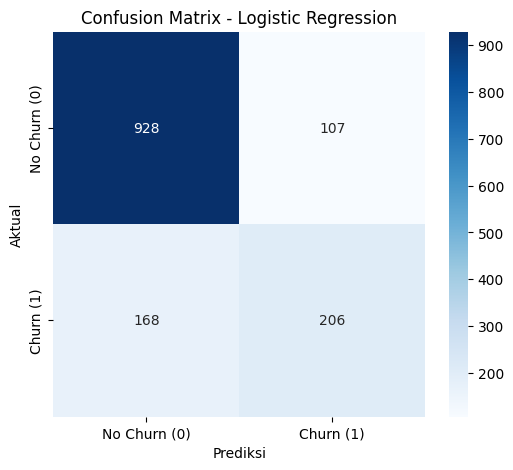

Melatih model: Random Forest...
{'Accuracy': 0.7877927608232789, 'Precision': 0.6279863481228669, 'Recall': 0.4919786096256685, 'F1-Score': 0.5517241379310345}


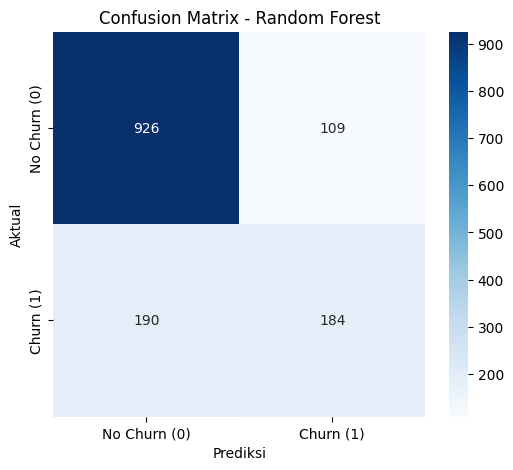

Melatih model: Voting Classifier...
{'Accuracy': 0.7998580553584103, 'Precision': 0.652317880794702, 'Recall': 0.5267379679144385, 'F1-Score': 0.5828402366863905}


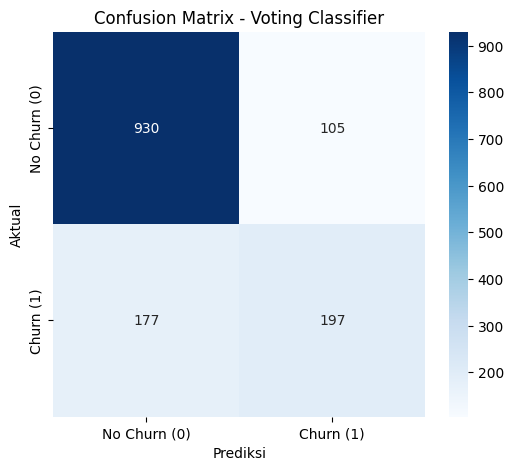

In [ ]:
# Pelatihan ketiga model dan evaluasi
for name, model in direct_Models.items():
    print(f"Melatih model: {name}...")

    # Pelatihan model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # 5. Evaluasi Metrik
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    print(results[name])

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn (0)', 'Churn (1)'],
                yticklabels=['No Churn (0)', 'Churn (1)'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Aktual')
    plt.xlabel('Prediksi')
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_")}.png')
    plt.show()
